In [24]:
import pandas as pd
import scienceplots
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
data_path_2wv = Path("/home/garyqwt/Project/TFO_fSpO2_estimation/results/sim_results_FusionMLP_64_interp2.csv")
data_path_3wv = Path("/home/garyqwt/Project/TFO_fSpO2_estimation/results/sim_results_FusionMLP_64_interp2_3WL.csv")

data_2wv = pd.read_csv(data_path_2wv)
data_3wv = pd.read_csv(data_path_3wv)

data_2wv["Wavelengths Used"] = "Two Wavelengths"
data_3wv["Wavelengths Used"] = "Three Wavelengths"
# Drop the all depth
data_2wv = data_2wv[data_2wv["depth"] != "all"]
data_3wv = data_3wv[data_3wv["depth"] != "all"]
# Convert the depth to float
data_2wv["depth"] = data_2wv["depth"].astype(float)
data_3wv["depth"] = data_3wv["depth"].astype(float)
# The 2wv data does not have the 6mm added in
data_2wv["depth"] += 6.0

data = pd.concat([data_2wv, data_3wv])
data.rename(columns={"depth": "Fetal Depth (mm)"}, inplace=True)
data.head()

,Fetal Depth (mm),train_mae,train_std,test_mae,test_std,r_train,p_train<0.001,r_test,p_test<0.001,Wavelengths Used
0,10.0,3.10,2.41,3.09,2.45,0.96,p < 0.001,0.96,p < 0.001,Two Wavelengths
1,11.0,1.71,1.61,1.69,1.67,0.98,p < 0.001,0.98,p < 0.001,Two Wavelengths
2,12.0,2.60,2.18,2.63,2.23,0.96,p < 0.001,0.96,p < 0.001,Two Wavelengths
3,13.0,2.15,2.11,2.16,2.11,0.97,p < 0.001,0.97,p < 0.001,Two Wavelengths
4,14.0,1.93,1.69,1.96,1.77,0.98,p < 0.001,0.98,p < 0.001,Two Wavelengths


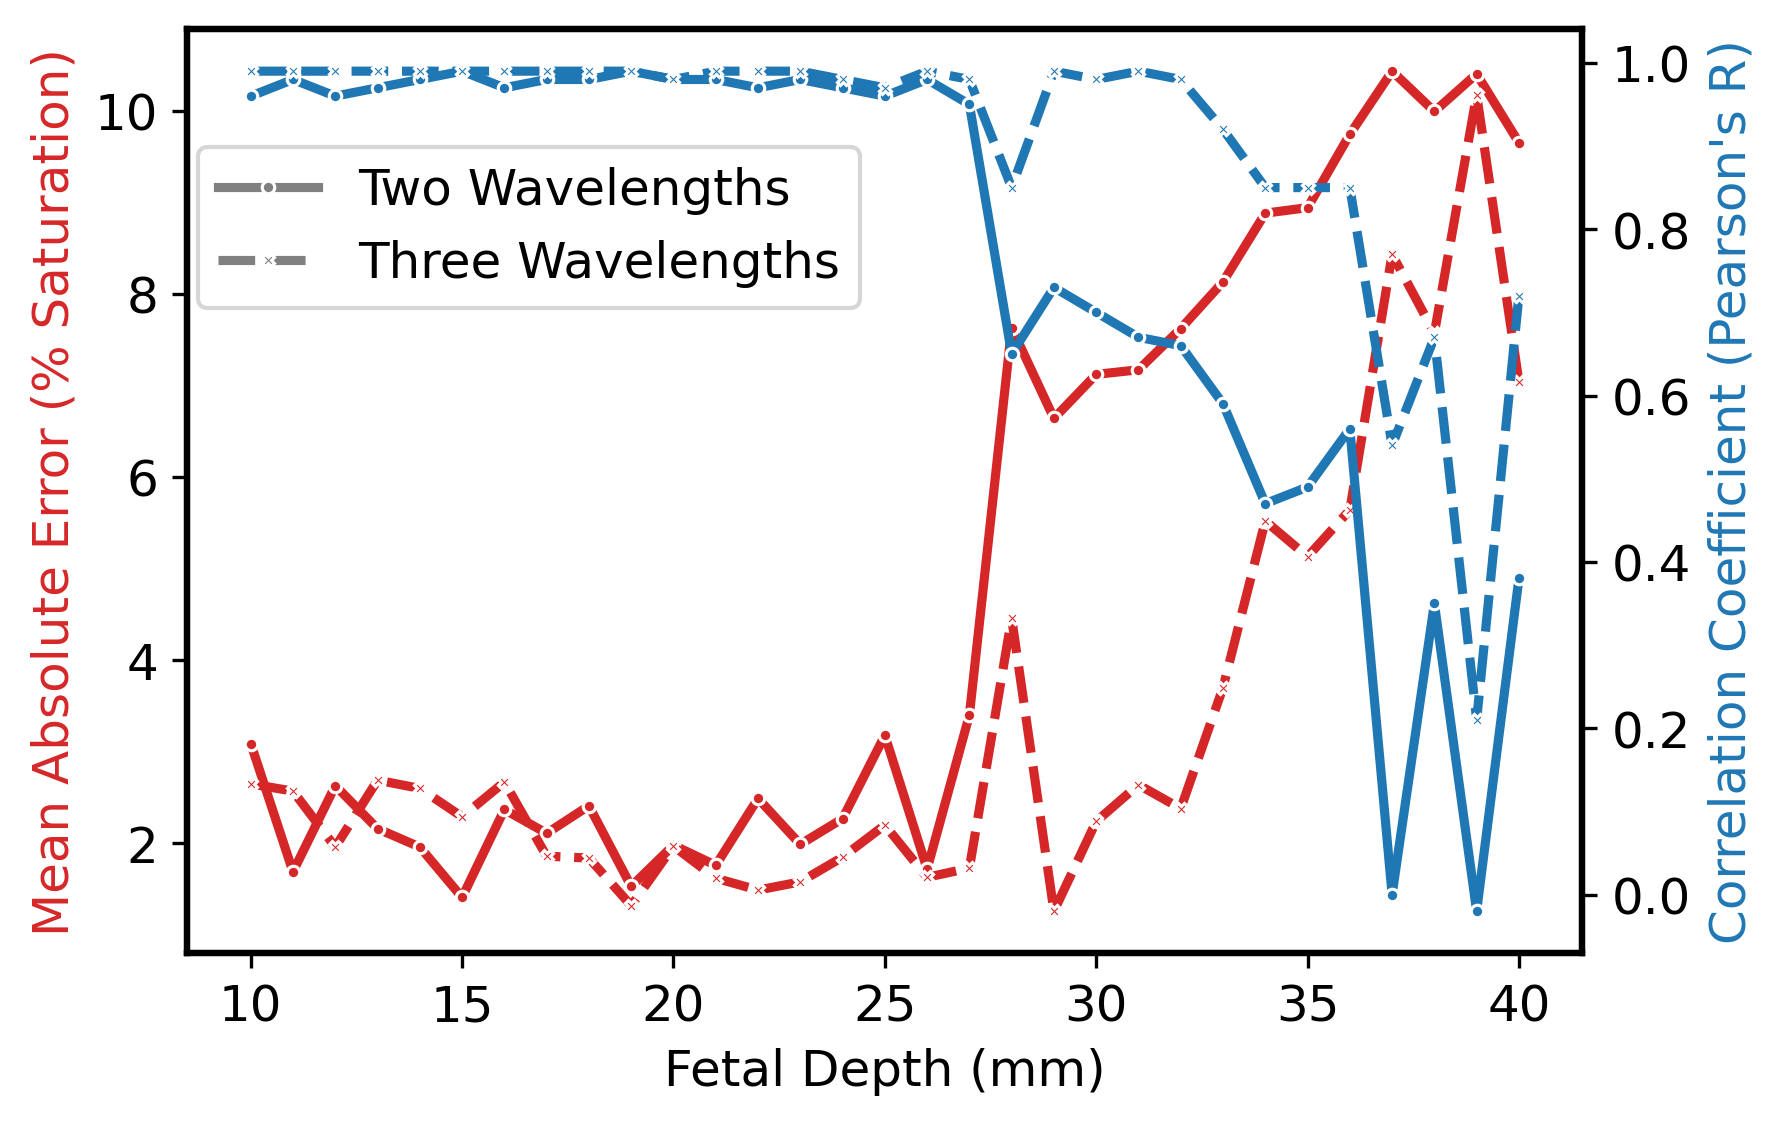

<Figure size 330x250 with 0 Axes>

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("nature")
plt.figure(figsize=(6, 4), dpi=300)

# Increase all font sizes to 2x the default
FONT_SIZE = 12
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize

# Make the lines thicker
plt.rc('lines', linewidth=2.2)

# Make the axis lines thicker
plt.rc('axes', linewidth=1.5)


# Plot the test_mae vs. depth for the two and three wavelength models and use the test_std as the error bars
ax_left = plt.gca()
sns.lineplot(data=data, x="Fetal Depth (mm)", y="test_mae", style="Wavelengths Used", markers=True, palette=["tab:red"] * 2, hue="Wavelengths Used")
plt.legend(loc="upper right", bbox_to_anchor=(0.5, 0.9))
# Drop the color from the lines on the legend
plt.setp(ax_left.get_legend().get_lines(), color='grey')


# Set a secondary y-axis
plt.twinx()
ax_right = plt.gca()
# Plot the r_test vs. depth for the two and three wavelength models but hide the legend
sns.lineplot(data=data, x="Fetal Depth (mm)", y="r_test", style="Wavelengths Used", markers=True, palette=["tab:blue"] * 2, legend=False, hue="Wavelengths Used")

ax_left.set_ylabel("Mean Absolute Error (% Saturation)")
ax_right.set_ylabel("Correlation Coefficient (Pearson's R)")
# ax_left.set_ylim(bottom=0.0)
# ax_right.set_ylim(bottom=0.0, top=1.0)

# Change the color of the y-axis labels to match the lines
ax_left.yaxis.label.set_color("tab:red")
ax_right.yaxis.label.set_color("tab:blue")

# plt.tight_layout()

plt.show()
plt.savefig("sim_results_FusionMLP_64_interp2_3WL.pdf", dpi=400, bbox_inches="tight")